In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
%cd /content/drive/MyDrive/Github

In [ ]:
%cd 'soil-physics-theory'


/content/drive/MyDrive/Github/soil-physics-theory


In [ ]:
%cd 'content/chapter-4'

/content/drive/MyDrive/Github/soil-physics-theory/content/chapter-4


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PSP_heat import *
from PSP_thermalCond import *
from PSP_soil import *
from math import *

**Q no. 4.1 . Use the function thermal Conductivity to investigate the temperature dependence of thermal conductivity. At what temperature is the thermal conductivity of wet soil independent of water content? Explain why the temperature dependence of conductivity disappears at this temperature.**

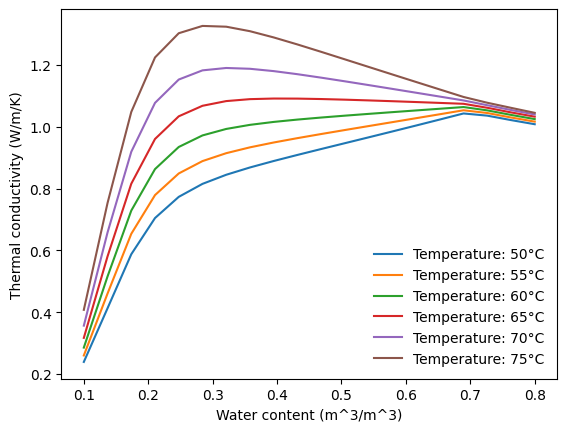

In [ ]:
from PSP_heatSoil import thermalConductivity
bulkDensity = 800  # kg/m^3
clay = 0.30  # clay content of soil (g/g)
waterContents = np.linspace(0.1, 0.8, 20)  # Vary water content from 30% to 50%
temperatures = range(50, 80, 5)  # Temperature range from 60°C to 100°C

# Calculate thermal conductivity for each temperature and water content
thermal_conductivities = []
for temp in temperatures:
    conductivity_at_temp = []
    for water_content in waterContents:
        conductivity_at_temp.append(thermalConductivity(bulkDensity, water_content, clay, temp))
    thermal_conductivities.append(conductivity_at_temp)

# Plotting
for i, temp in enumerate(temperatures):
    plt.plot(waterContents, thermal_conductivities[i], label=f'Temperature: {temp}°C')

plt.xlabel('Water content (m^3/m^3)')
plt.ylabel('Thermal conductivity (W/m/K)')
plt.legend(fontsize='8')
plt.legend(frameon=False)
plt.grid(False)
plt.show()

The dependence of thermal conductivity on water content for five
different temperatures, generated using a bulk density of 1100 kg m–3 and a clay content
of 0.3. At about 65 C, the apparent thermal conductivity from latent heat transport is equal to the thermal conductivity of water, so increasing water content does not affect the soil conductivity, at water content above 0.3 m^3 m^-3.


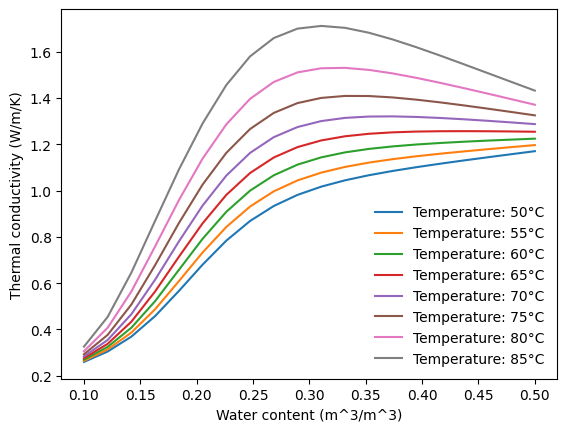

In [ ]:
from PSP_heatSoil import thermalConductivity
bulkDensity = 1100  # kg/m^3
clay = 0.5  # clay content of soil (g/g)
waterContents = np.linspace(0.1, 0.5, 20)  # Vary water content from 30% to 50%
temperatures = range(50, 90, 5)  # Temperature range from 60°C to 100°C

# Calculate thermal conductivity for each temperature and water content
thermal_conductivities = []
for temp in temperatures:
    conductivity_at_temp = []
    for water_content in waterContents:
        conductivity_at_temp.append(thermalConductivity(bulkDensity, water_content, clay, temp))
    thermal_conductivities.append(conductivity_at_temp)

# Plotting
for i, temp in enumerate(temperatures):
    plt.plot(waterContents, thermal_conductivities[i], label=f'Temperature: {temp}°C')

plt.xlabel('Water content (m^3/m^3)')
plt.ylabel('Thermal conductivity (W/m/K)')
plt.legend(fontsize='8')
plt.legend(frameon=False)
plt.grid(False)
plt.show()

**Q. no. 4.2 What is the possible range of volumetric specific heat in mineral soils?**


In [ ]:
from PSP_heatSoil import heatCapacity
bulkDensity = 950 # kg m^-3
waterContent = 0.00 # m^3 m^-3
C_h = heatCapacity(bulkDensity, waterContent)
print("The minimum heat capacity is approximately " + f'{C_h/10**6:.3f}' + " MJ/m^3/K.")

The minimum heat capacity is approximately 0.860 MJ/m^3/K.


The minimum value will occur when bulk density and soil water content are at their minimum values, which for mineral soils could be a bulk density of 950 kg m −3  and soil water content of 0.00 m 3  m −3 .

In [ ]:
bulkDensity = 950 # kg m^-3
porosity = 1 - bulkDensity/2650 # m^3 m^-3
waterContent = porosity # m^3 m^-3
C_h = heatCapacity(bulkDensity, waterContent)
print("The maximum heat capacity is approximately " + f'{C_h/10**6:.3f}' + " MJ/m^3/K.")

The maximum heat capacity is approximately 3.542 MJ/m^3/K.


The maximum value will occur when bulk density is minimum and soil water content is maximum, which for mineral soils could be a bulk density of 950 kg m −3  and soil water content equal to the porosity.

**Q. no. 4.3 Use the program to predict soil temperature as a function of time and depth.What effect would a surface residue mulch have on soil temperature? At what depth are
temperature changes 180 degrees out of phase with the surface temperature?**


1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.3
mean temperature [C]: 25
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


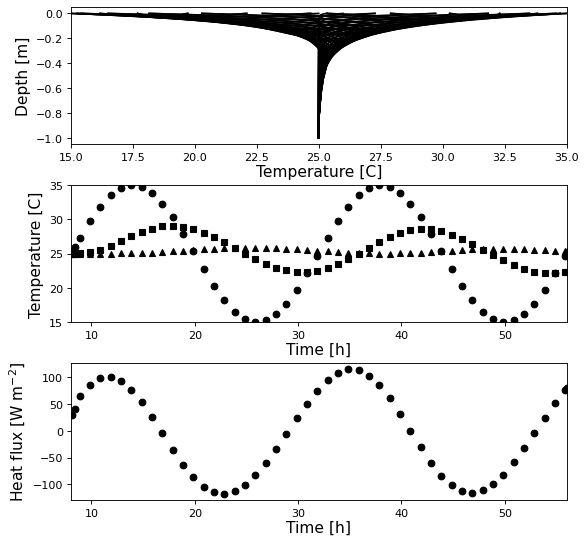

In [ ]:
from main2 import main
bulkDensity = 1000. # kg/m3
clay = 0.00 # g/g
main(bulkDensity, clay)

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.4
mean temperature [C]: 25
amplitude of change in temperature [C]: 5
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


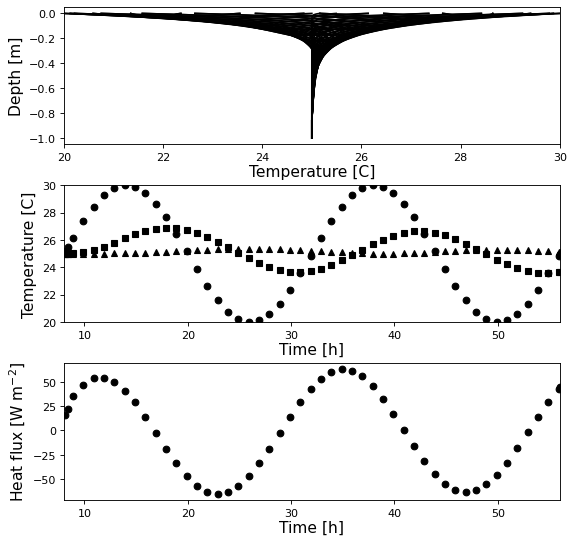

In [ ]:
from main2 import main
bulkDensity = 900. # kg/m3
clay = 0.4 # g/g
main(bulkDensity, clay)

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.5
mean temperature [C]: 25
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


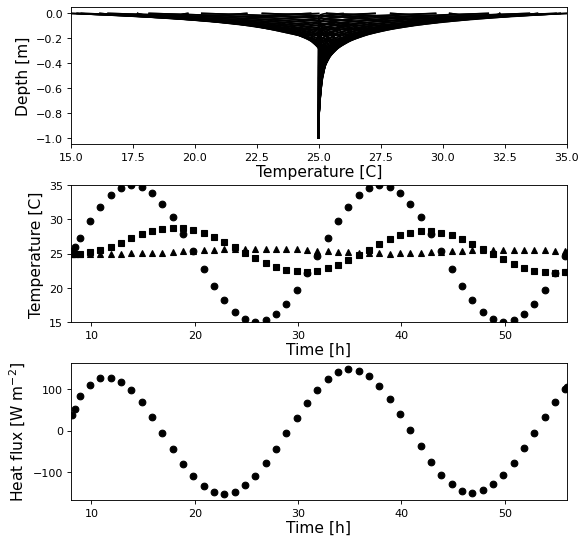

In [ ]:
from main2 import main
bulkDensity = 900. # kg/m3
clay = 0.5 # g/g
main(bulkDensity, clay)

Though all these three graphs seems similar, we can see the value of heat flux in y-axis is different in range from each graph.
At 0.3 m depth temperature changes 180 degrees out of phase with the surface temperature.

**Q. no. 4.4Modify the program PSP_heat.py so that it allows water content to change with depth. Then compare simulations for uniform, dry soil with simulations of a moist
soil with a dry dust mulch on the surface**


**Assuming uniform water content with 0.08 water content and mean temperature 0.08.**

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.08
mean temperature [C]: 15
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


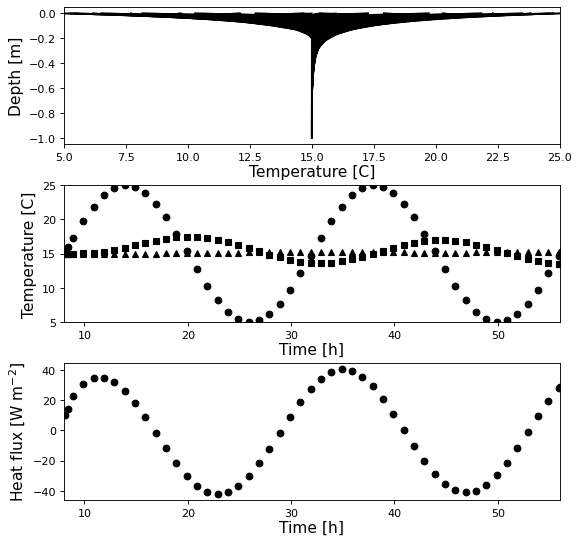

In [ ]:
from main2 import main
bulkDensity = 900. # kg/m3
clay = 0.4 # g/g
main(bulkDensity, clay)

**Assuming variable water content**

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?2
surface water content (m^3/m^3): 0.08
sub-surface water content (m^3/m^3): 0.5
mean temperature [C]: 15
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


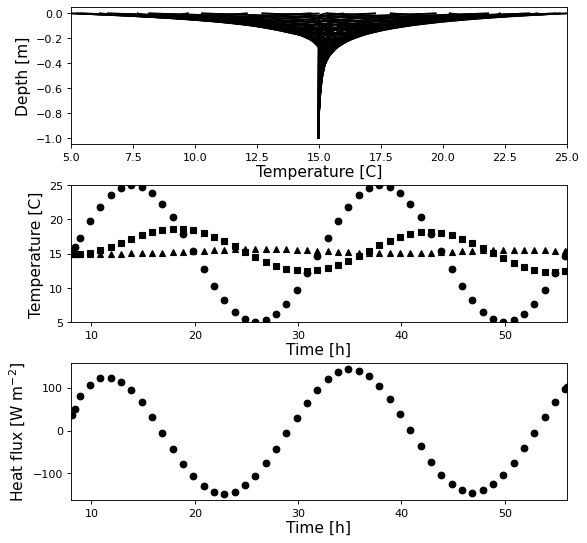

In [ ]:
from main2 import main
bulkDensity = 900. # kg/m3
clay = 0.4 # g/g
main(bulkDensity, clay)

The change in heat flux for variable water content is almost double compared to uniform water content.

**Q. no. 5. Modify the program main.py to print on screen soil temperatures at 0.15 and
0.3 m depths.**


In [ ]:
from main3_cole.py import main
bulkDensity = 1000 # kg m^-3
clay = 0.4
main(bulkDensity,clay)

SyntaxError: invalid syntax (<ipython-input-8-f44599510241>, line 1)

In [ ]:
from main3_bab.py import main
bulkDensity = 1000 # kg m^-3
clay = 0.4
main(bulkDensity,clay)

ModuleNotFoundError: No module named 'main3_bab'

**Q.n0. 4.6. Modify the values of clay content and bulk density in the program PSP_soil.py
and investigate the effects of these variables on soil temperature. Compare simula- tionsforasand,asiltloamandclaysoilandforacompactedsoil(ρb =1500kgm–3) andarecentlytilledsoil(ρb =900kgm–3).**

In [ ]:
Db= [1500,1100, 900]
clay_rat= [0.0,0.1,0.4,0.6]
theta = 0.3
temp = 25

for i in Db:
    for j in clay_rat:
        K = thermalConductivity(i, theta, j, temp)
        print('bulk density = ', i, ' clay = ', j, ' conductivity = ', K)

bulk density =  1500  clay =  0.0  conductivity =  1.1911858565241173
bulk density =  1500  clay =  0.1  conductivity =  1.1905622999739145
bulk density =  1500  clay =  0.4  conductivity =  1.1806354495256233
bulk density =  1500  clay =  0.6  conductivity =  1.150944443901511
bulk density =  1100  clay =  0.0  conductivity =  0.7799462734679455
bulk density =  1100  clay =  0.1  conductivity =  0.779082334950073
bulk density =  1100  clay =  0.4  conductivity =  0.7653864607299508
bulk density =  1100  clay =  0.6  conductivity =  0.7250166470835194
bulk density =  900  clay =  0.0  conductivity =  0.6287009448453018
bulk density =  900  clay =  0.1  conductivity =  0.6278320949527835
bulk density =  900  clay =  0.4  conductivity =  0.6140934984325185
bulk density =  900  clay =  0.6  conductivity =  0.5739766598610492


**As, the clay content increases the conductivity decreases and vice versa for bulk density.**


**Using 0% clay and bulk density 1500 kg/m^3
for sandy soil**


1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.3
mean temperature [C]: 20
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


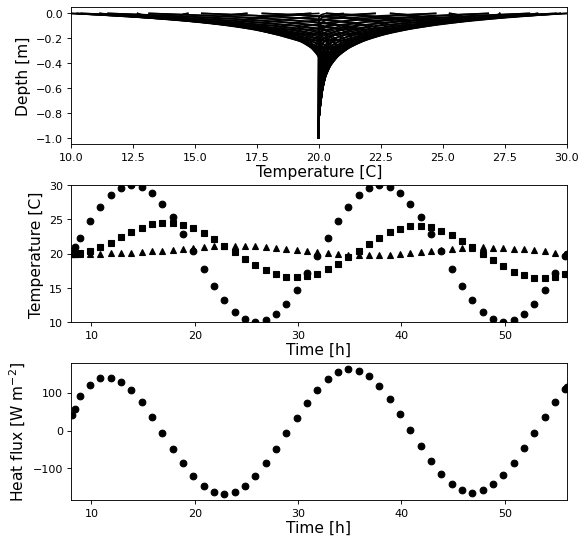

In [ ]:
bulkDensity = 1500. # kg/m3
clay = 0.00 # g/g
from main2 import main
main(bulkDensity, clay)

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 2
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.3
mean temperature [C]: 20
amplitude of change in temperature [C]: 10
nr of simulation hours: 48
nr of iterations per hour: 1.0625


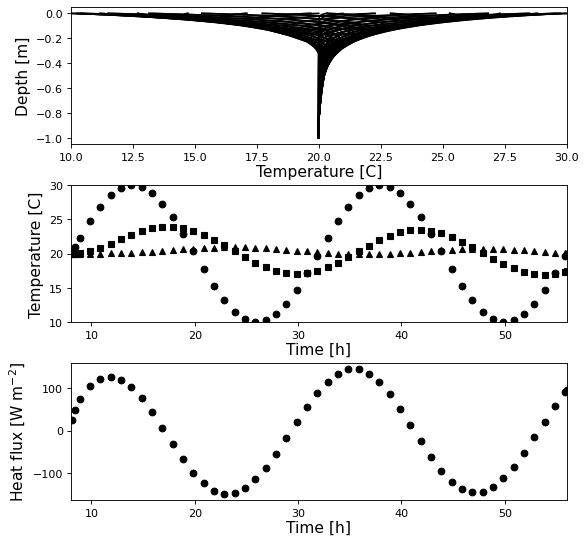

In [ ]:
bulkDensity = 1500. # kg/m3
clay = 0.00 # g/g
from main2 import main
main(bulkDensity, clay) #selecting cell-centered finite volume

**For silt loam soil with 10% clay**

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.3
mean temperature [C]: 20
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


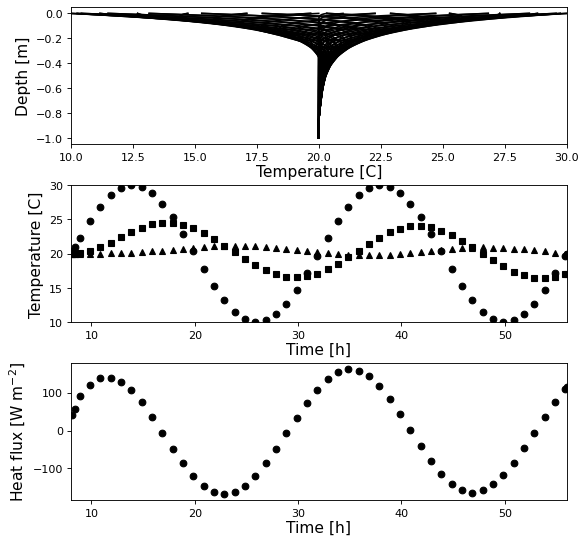

In [ ]:
bulkDensity = 1500. # kg/m3
clay = 0.1 # g/g
from main2 import main
main(bulkDensity, clay)

**For clay soil with 60% clay and 1500 bulk density**


1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.3
mean temperature [C]: 20
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


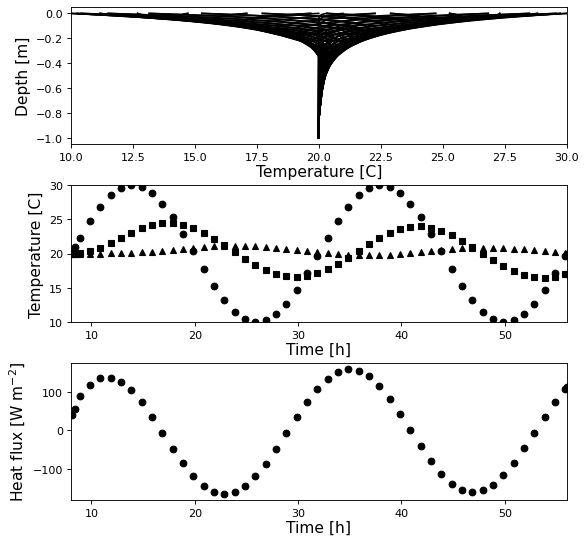

In [ ]:
bulkDensity = 1500. # kg/m3
clay = 0.6 # g/g
from main2 import main
main(bulkDensity, clay)

**For tilled soil with bulk density 900 kg/m^3 and
sandy soil with 0% clay**

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.3
mean temperature [C]: 20
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


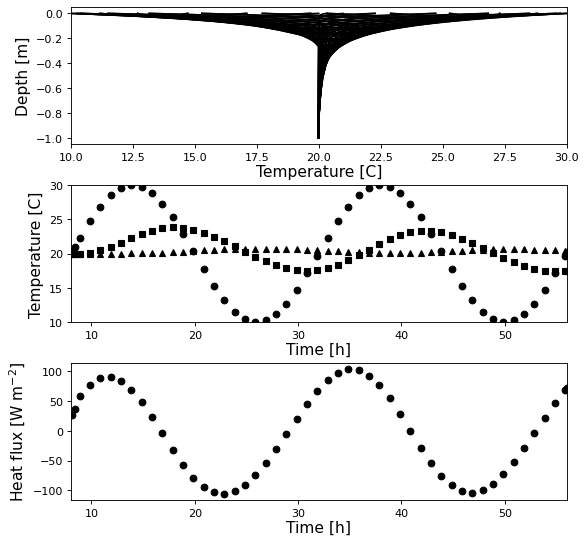

In [ ]:
bulkDensity = 900. # kg/m3
clay = 0.0 # g/g
from main2 import main
main(bulkDensity, clay)

**For tilled soil with bulk density 900 kg/m^3 and
silt loam with 10% clay**

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.3
mean temperature [C]: 20
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


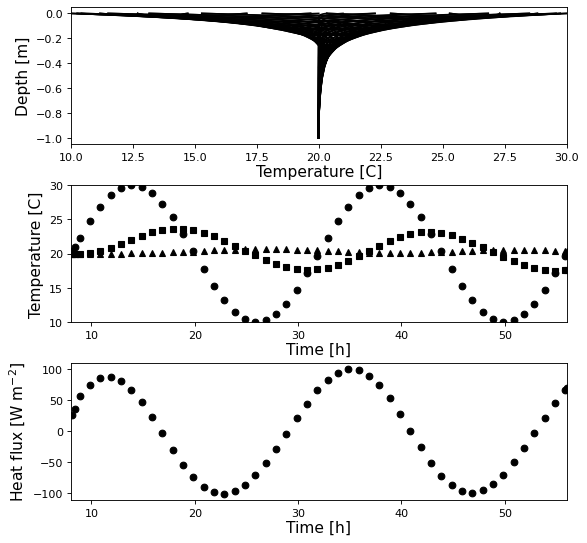

In [ ]:
bulkDensity = 900. # kg/m3
clay = 0.6 # g/g
from main2 import main
main(bulkDensity, clay)

**For tilled soil with bulk density 900 kg/m^3 and clay soil with 60% clay**

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.3
mean temperature [C]: 20
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


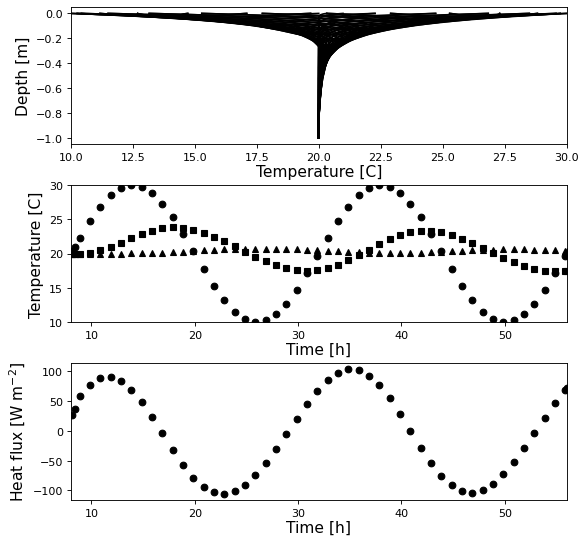

In [ ]:
bulkDensity = 900. # kg/m3
clay = 0.1 # g/g
from main2 import main
main(bulkDensity, clay)

**Q. no. 4.7.Modify the program PSP_heat.py and investigate the effects of explicit Euler, implicit Euler and Crank–Nicolson numerical solutions.**


1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.2
mean temperature [C]: 25
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 1
nr of simulation hours: 72
nr of iterations per hour: 1.0416666666666667


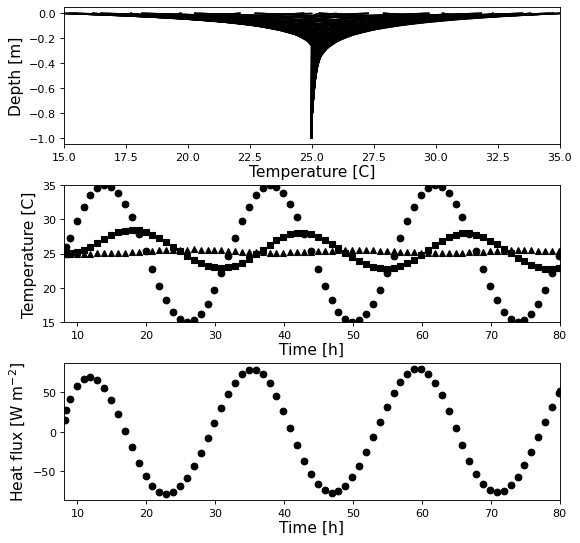

In [ ]:
from main2 import main
bulkDensity = 900. # kg/m3
clay = 0.4 # g/g
main(bulkDensity, clay)
#implicit Euler weighting factor=1

**When used Explicit= 0 gives dt= 1 no convergence**

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.3
mean temperature [C]: 25
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.5
nr of simulation hours: 72
nr of iterations per hour: 1.0416666666666667


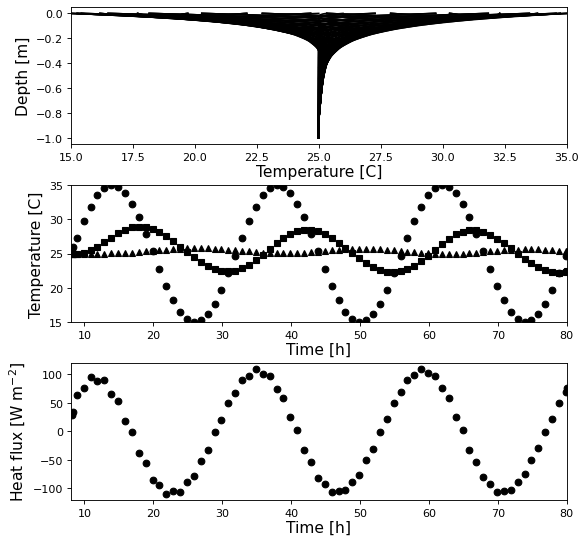

In [ ]:
from main2 import main
bulkDensity = 900. # kg/m3
clay = 0.4 # g/g
main(bulkDensity, clay)
# Crank–Nicolson weighting factor=0.5